## 2-D layer of interacting cells with periodic boundary condictions

In [1]:
import PyDSTool_aux_functions as aux
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def HS(X,X0,nX,l):
    return l + (1.0-l)/(1.0 + (X/X0)**nX)

def patterning(eqs, p, vlim, v, r_v, fig_name=False, xlim=False, ylim=False, xticks=False, yticks=False):
    n = p['ncells']*p['ncells']
    X = {}
    for i in vlim.keys():
        X[i]=[]
    X['V'] = []
    y = np.zeros((len(r_v),3))
    for k in range(len(r_v)):
        if v=='f':                 # Fringe Effect
            p['ldf'] = 1 + 2*r_v[k]
            p['ljf'] = 1 - 0.7*r_v[k]
        else:
            p[v] = r_v[k]
        z = np.zeros((3, p['ncomb']))
        for i in range(p['ncomb']):
            pts = aux.euler_traj(eqs,p,vlim)
            x = pts['R']*p['kt']*p['Vt']/p['gI']
            x = np.asarray(x)
            z[0][i] = np.sum(x<100)
            z[1][i] = n - np.sum(x<100) - np.sum(x>300)
            z[2][i] = np.sum(x>300)

            for j in vlim.keys():
                X[j] += [list(pts[j].reshape(1,n)[0])]
            X['V'] += [list(pts['R'].reshape(1,n)[0]*p['kt']*p['Vt']/p['gI'])]
        for j in range(3):
            y[k][j] = np.mean(z[j][:])/float(n)

    plt.figure(figsize=(7,5))  
    plt.rcParams.update({'font.size': 22}) 
    plt.plot(r_v,y[:,0],'-o', color=[0.36862745,0.66666667,0.98039216], linewidth=2, markersize=20, label='stalk')
    plt.plot(r_v,y[:,1],'-^', color=[0.74117647,0.0745098 ,0.81176471], linewidth=2, markersize=20, label='t/s')
    plt.plot(r_v,y[:,2],'-s', color=[0.76470588,0.10980392,0.10980392], linewidth=2, markersize=20, label='tip')
    plt.ylim([-0.03, 1.03])
    plt.xlabel(v)
    plt.ylabel('Fraction of cells')
    plt.legend()
    if xlim:
        plt.xlim(xlim)
    if xticks:
        plt.xticks(xticks)
    if ylim:
        plt.ylim(ylim)
    if yticks:
        plt.yticks(yticks)
    if fig_name:
        plt.savefig(fig_name, format='pdf', dpi=500)
    plt.show()

In [2]:
p = {'g'  : 1.0e-1                                              # degradation of a protein 
    ,'gI' : 5.0e-1                                              # degradation of NICD 
    ,'kc' : 5.0e-4                                              # rate of cis interaction
    ,'kt' : 2.5e-5                                              # rate of trans interaction
    ,'p'  : 2.0e+0, 'pj' : 5.0e+0                               # hill coeficient
    ,'I0' : 2.0e+2, 'V0' : 2.0e+2                               # hill factor
    ,'Vt' : 0.2e+3                                              # external proteins
    ,'N0' : 1.2e+3, 'D0' : 1.0e+3, 'J0' : 0.8e+3, 'R0': 1.0e+3  # production rate
    ,'ln' : 2.0e+0, 'ld' : 0.0e+0, 'lj' : 2.0e+0                # lambda of shifted hill function
    ,'lr' : 0.0e+0, 'ldr': 2.0e+0
    ,'pf' : 1.0
    ,'ldf': 3.0,    'ljf': 0.3
    ,'HS' : HS
    }
vlim={'N': [0,10000], 'D': [0,1000], 'J': [0,5000], 'I': [0,1000], 'R': [0,1000]}
eqs = {'N': 'N0*HS(I,I0,p ,ln) - N*( (kc*D + kt*Dt)*HS(I,I0,pf,ldf) + (kc*J + kt*Jt)*HS(I,I0,pf,ljf) ) - g*N'
      ,'D': 'D0*HS(I,I0,p ,ld)*HS(kt*R*Vt/gI,V0,p,ldr) - D*(  kc*N*HS(I,I0,pf,ldf) + kt*Nt ) - g*D'
      ,'J': 'J0*HS(I,I0,pj,lj)                         - J*(  kc*N*HS(I,I0,pf,ljf) + kt*Nt ) - g*J'
      ,'I': 'kt*N*( Dt*HS(I,I0,pf,ldf) + Jt*HS(I,I0,pf,ljf) ) - gI*I'
      ,'R': 'R0*HS(I,I0,p ,lr) - R*kt*Vt - g*R'
      }

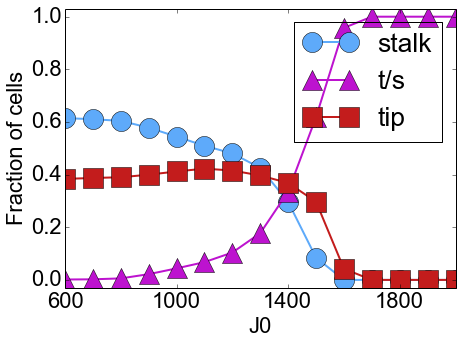

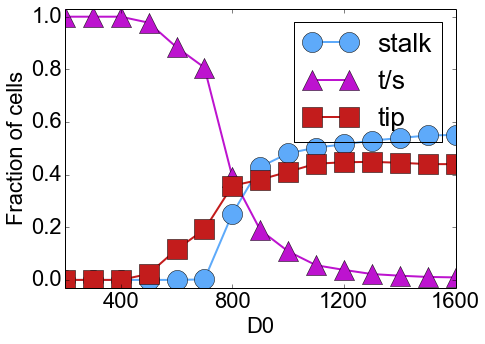

In [3]:
p['ncells'] = 20
p['ncomb'] = 10
p['dt'] = 0.1
p['t']  = 100
p['Vt'] = 1000

#------------------------ Fig. 5B ------------------------------------------
v   = 'J0'
r_v = np.arange(600,2001,100)
patterning(eqs, p, vlim, v, r_v, xticks=[600, 1000, 1400, 1800], fig_name='./figures/2Dpatternig_J0.pdf')
#------------------------ Fig. 5D ------------------------------------------
p['J0'] = 1200
v   = 'D0'
r_v = np.arange(200,1601,100)
patterning(eqs, p, vlim, v, r_v, xticks=[400, 800, 1200, 1600], fig_name='./figures/2Dpatternig_D0.pdf')

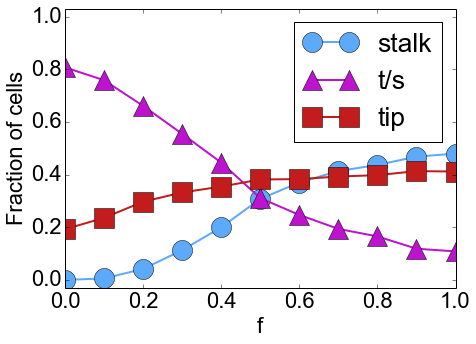

In [4]:
#------------------------ Fig. 6C ------------------------------------------
p['D0'] = 1000
v   = 'f'
r_v = np.arange(0,1.01,0.1)
patterning(eqs, p, vlim, v, r_v, xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fig_name='./figures/2Dpatternig_Fng.pdf')

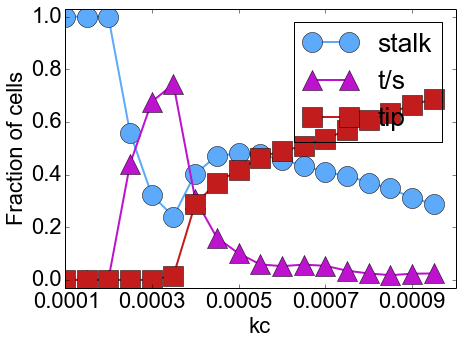

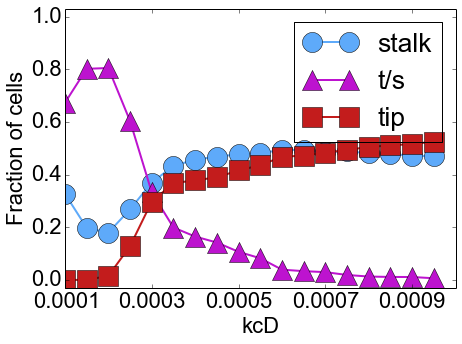

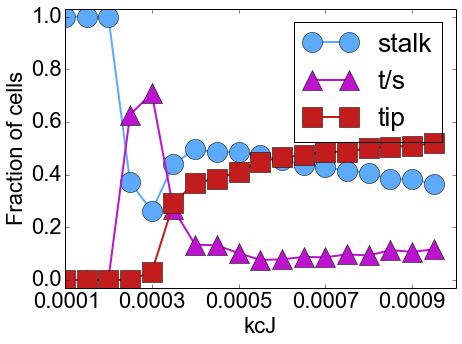

In [5]:
p['ljf'] = 0.3
p['ldf'] = 3.0
v   = 'kc'
r_v = np.arange(1,10,0.5)*1e-4
patterning(eqs, p, vlim, v, r_v, xticks=[0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 
           fig_name='./figures/2Dpatternig_cis.pdf')

eqs['N'] = 'N0*HS(I,I0,p ,ln) - N*( (kcD*D + kt*Dt)*HS(I,I0,pf,ldf) + (kcJ*J + kt*Jt)*HS(I,I0,pf,ljf) ) - g*N'
eqs['D'] = 'D0*HS(I,I0,p ,ld)*HS(kt*R*Vt/gI,V0,p,ldr) - D*(  kcD*N*HS(I,I0,pf,ldf) + kt*Nt ) - g*D'
eqs['J'] = 'J0*HS(I,I0,pj,lj)                         - J*(  kcJ*N*HS(I,I0,pf,ljf) + kt*Nt ) - g*J'
p['kcD'] = 5e-4
p['kcJ'] = 5e-4

v   = 'kcD'
r_v = np.arange(1,10,0.5)*1e-4
patterning(eqs, p, vlim, v, r_v, xticks=[0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 
           fig_name='./figures/2Dpatternig_cis_kcD.pdf')

p['kcD'] = 5e-4
v   = 'kcJ'
patterning(eqs, p, vlim, v, r_v, xticks=[0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 
           fig_name='./figures/2Dpatternig_cis_kcJ.pdf')